<a href="https://colab.research.google.com/github/SofiaLumbik/Coursework/blob/main/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_NLTK_%D0%B8_SpaCy_(eng).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import spacy
import time
import string
import matplotlib.pyplot as plt

In [ ]:
# Загрузка моделей и ресурсов
nltk.download('punkt')
nltk.download('stopwords')
spacy_nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Тестовый текст на английском
text = "The telephone is one of the most important inventions of the 19th century. Its creator was the English scientist Alexander Graham Bell. Bell wanted to be a teacher and entered Edinburgh University. But he changed his mind and became a student of the Medical Faculty of London University. Under the guidance of an outstanding German scientist who works on physiology of sight and ear, Bell began to study the human organs of articulation."

In [ ]:
# Удаление знаков препинания
text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
print (text_no_punct)

The telephone is one of the most important inventions of the 19th century Its creator was the English scientist Alexander Graham Bell Bell wanted to be a teacher and entered Edinburgh University But he changed his mind and became a student of the Medical Faculty of London University Under the guidance of an outstanding German scientist who works on physiology of sight and ear Bell began to study the human organs of articulation


In [ ]:
# Измерение времени выполнения токенизации
print("Время выполнения:")
start_time = time.time()
nltk_tokens = nltk.word_tokenize(text_no_punct)
nltk_time = time.time() - start_time
print(f"NLTK: {nltk_time:.6f} секунд")

start_time = time.time()
spacy_doc = spacy_nlp(text_no_punct)
spacy_tokens = [token.text for token in spacy_doc]
spacy_time = time.time() - start_time
print(f"spaCy: {spacy_time:.6f} секунд")

Время выполнения:
NLTK: 0.001859 секунд
spaCy: 0.080425 секунд


In [ ]:
# Сравнение токенизации
print("\nТокенизация:")
print("NLTK:", nltk_tokens)
print("spaCy:", spacy_tokens)


Токенизация:
NLTK: ['The', 'telephone', 'is', 'one', 'of', 'the', 'most', 'important', 'inventions', 'of', 'the', '19th', 'century', 'Its', 'creator', 'was', 'the', 'English', 'scientist', 'Alexander', 'Graham', 'Bell', 'Bell', 'wanted', 'to', 'be', 'a', 'teacher', 'and', 'entered', 'Edinburgh', 'University', 'But', 'he', 'changed', 'his', 'mind', 'and', 'became', 'a', 'student', 'of', 'the', 'Medical', 'Faculty', 'of', 'London', 'University', 'Under', 'the', 'guidance', 'of', 'an', 'outstanding', 'German', 'scientist', 'who', 'works', 'on', 'physiology', 'of', 'sight', 'and', 'ear', 'Bell', 'began', 'to', 'study', 'the', 'human', 'organs', 'of', 'articulation']
spaCy: ['The', 'telephone', 'is', 'one', 'of', 'the', 'most', 'important', 'inventions', 'of', 'the', '19th', 'century', 'Its', 'creator', 'was', 'the', 'English', 'scientist', 'Alexander', 'Graham', 'Bell', 'Bell', 'wanted', 'to', 'be', 'a', 'teacher', 'and', 'entered', 'Edinburgh', 'University', 'But', 'he', 'changed', 'his'

In [ ]:
# Стоп-слова
stop_words_nltk = set(nltk.corpus.stopwords.words('english'))
stop_words_spacy = spacy_nlp.Defaults.stop_words

In [ ]:
# Измерение времени удаления слов-паразитов
print("Время выполнения:")
start_time = time.time()
nltk_tokens = nltk.word_tokenize(text_no_punct)
nltk_filtered = [word for word in nltk_tokens if word.lower() not in stop_words_nltk]
nltk_time = time.time() - start_time
print(f"NLTK: {nltk_time:.6f} секунд")

start_time = time.time()
spacy_doc = spacy_nlp(text_no_punct)
spacy_filtered = [token.text for token in spacy_doc if not token.is_stop]
spacy_time = time.time() - start_time
print(f"spaCy: {spacy_time:.6f} секунд")

Время выполнения:
NLTK: 0.001010 секунд
spaCy: 0.104607 секунд


In [ ]:
# Сравнение результатов удаления стоп-слов
print("\nУдаление стоп-слов:")
print("NLTK:", nltk_filtered)
print("spaCy:", spacy_filtered)


Удаление стоп-слов:
NLTK: ['telephone', 'one', 'important', 'inventions', '19th', 'century', 'creator', 'English', 'scientist', 'Alexander', 'Graham', 'Bell', 'Bell', 'wanted', 'teacher', 'entered', 'Edinburgh', 'University', 'changed', 'mind', 'became', 'student', 'Medical', 'Faculty', 'London', 'University', 'guidance', 'outstanding', 'German', 'scientist', 'works', 'physiology', 'sight', 'ear', 'Bell', 'began', 'study', 'human', 'organs', 'articulation']
spaCy: ['telephone', 'important', 'inventions', '19th', 'century', 'creator', 'English', 'scientist', 'Alexander', 'Graham', 'Bell', 'Bell', 'wanted', 'teacher', 'entered', 'Edinburgh', 'University', 'changed', 'mind', 'student', 'Medical', 'Faculty', 'London', 'University', 'guidance', 'outstanding', 'German', 'scientist', 'works', 'physiology', 'sight', 'ear', 'Bell', 'began', 'study', 'human', 'organs', 'articulation']


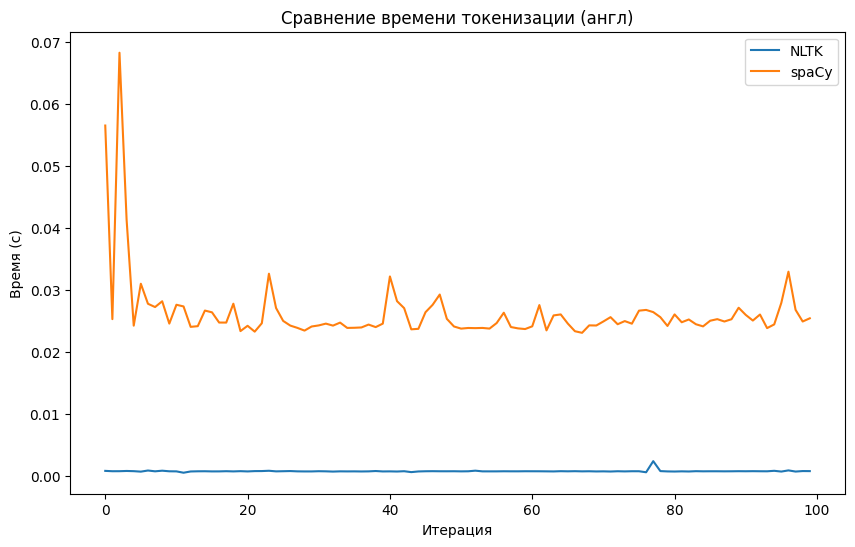

In [ ]:
# Измерение времени токенизации
nltk_times = []
spacy_times = []

for i in range(100):
    start_time = time.time()
    nltk_tokens = nltk.word_tokenize(text_no_punct)
    nltk_time = time.time() - start_time
    nltk_times.append(nltk_time)

    start_time = time.time()
    spacy_doc = spacy_nlp(text_no_punct)
    spacy_tokens = [token.text for token in spacy_doc]
    spacy_time = time.time() - start_time
    spacy_times.append(spacy_time)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(nltk_times, label='NLTK')
plt.plot(spacy_times, label='spaCy')
plt.xlabel('Итерация')
plt.ylabel('Время (с)')
plt.title('Сравнение времени токенизации (англ)')
plt.legend()
plt.show()

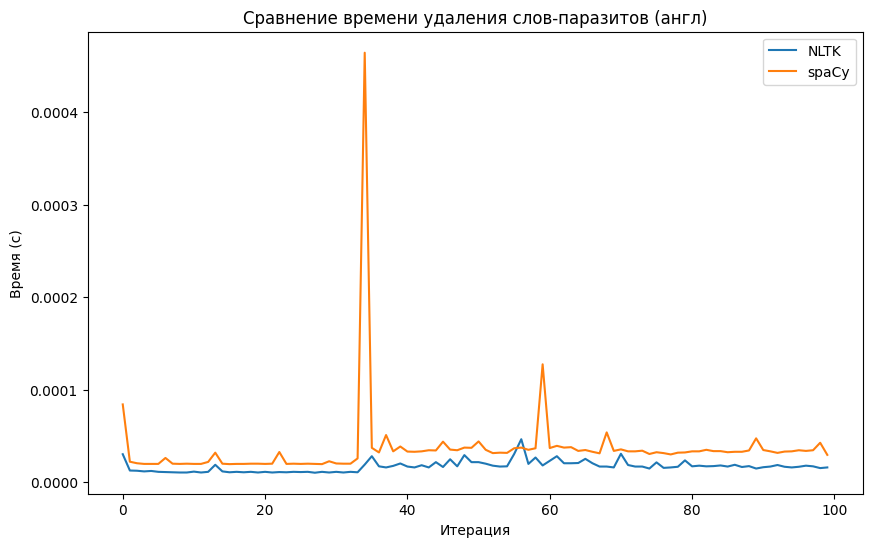

In [ ]:
# Измерение времени удаления стоп-слов
nltk_times = []
spacy_times = []

for i in range(100):
    start_time = time.time()
    nltk_filtered = [word for word in nltk_tokens if word.lower() not in stop_words_nltk]
    nltk_time = time.time() - start_time
    nltk_times.append(nltk_time)

    start_time = time.time()
    spacy_filtered = [token.text for token in spacy_doc if not token.is_stop]
    spacy_time = time.time() - start_time
    spacy_times.append(spacy_time)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(nltk_times, label='NLTK')
plt.plot(spacy_times, label='spaCy')
plt.xlabel('Итерация')
plt.ylabel('Время (с)')
plt.title('Сравнение времени удаления слов-паразитов (англ)')
plt.legend()
plt.show()